## Pokemons

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

## Почему покемоны?

Изначально я выбрала для анализа данные по пропавшим людям, была уверена, что мне это интересно. Загрузила данные и начала с ними работать, поняла, что понятия не имею, что хочу изучить, проанализировать и визуализировать. Вспомнила наше последнее занятие, на котором мы работали с дата-сетом по покемонам, это было действительно интересно. Решила выбрать его, чтобы получить удовольствие от работы с данными :)

## Что я хочу узнать во время работы с данными?

#### Во время работы с данными я хотела посмотреть:

##### Какие типы покемонов есть и сколько покемонов относится к каждому типу;

##### Вывести покемонов нескольких типов и посмотреть их показатели;

##### С помощью срезов посмотреть, какие покемоны относятся к двум типам одновременно;

##### Отсортировать покемонов, которые относятся к двум типам: poison и grass, по разным параметрам, чтобы посмотреть, кто из них сильнее;

##### Визуализировать данные о силе и скорости покемонов «poison и grass», чтобы посмотреть, как они соотносятся;


### Задание 1: вывод первых строк и подготовка данных к работе

In [1]:
import pandas as pd #импорт библиотеки: для обработки и анализа данных

In [2]:
import numpy as np #импорт библиотеки: работа с большими массивами данных

In [3]:
import matplotlib.pyplot as plt #импорт библиотеки для визуализации

In [5]:
%matplotlib inline

In [20]:
data = pd.read_csv('Pokemon.csv') #чтение файла с данными

In [21]:
data.head(5) #вывела 5 строк

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [22]:
data_index = pd.read_csv('pokemon.csv', index_col = 'Name') #убрала индексы и сделала главным столбец с именем

In [23]:
data_index.head(5)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [24]:
data_index = data_index.drop(['#', 'Generation', 'Legendary'], 1) #убрала ненужные столбцы

In [26]:
data_index[0:9] #вывела первые 10 строк

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
Ivysaur,Grass,Poison,405,60,62,63,80,80,60
Venusaur,Grass,Poison,525,80,82,83,100,100,80
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
Charmander,Fire,NaN,309,39,52,43,60,50,65
Charmeleon,Fire,NaN,405,58,64,58,80,65,80
Charizard,Fire,Flying,534,78,84,78,109,85,100
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100


### Среднее, медиана, максимум и минимум

In [27]:
data_index.describe() #медиана, среднее значение, минимальное и максимальное значения по разным показателям покемонов  

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


### Вывод столбцов 

In [30]:
data_index[0:9]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
Ivysaur,Grass,Poison,405,60,62,63,80,80,60
Venusaur,Grass,Poison,525,80,82,83,100,100,80
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
Charmander,Fire,NaN,309,39,52,43,60,50,65
Charmeleon,Fire,NaN,405,58,64,58,80,65,80
Charizard,Fire,Flying,534,78,84,78,109,85,100
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100


In [32]:
data_index['Type 1'].head(5) #Вывела типы первых пяти покемонов

Name
Bulbasaur                Grass
Ivysaur                  Grass
Venusaur                 Grass
VenusaurMega Venusaur    Grass
Charmander                Fire
Name: Type 1, dtype: object

### Вывод строк

In [35]:
data_index['Type 1'][0:10] #Захотела посмотреть типы первых 10 покемонов

Name
Bulbasaur                    Grass
Ivysaur                      Grass
Venusaur                     Grass
VenusaurMega Venusaur        Grass
Charmander                    Fire
Charmeleon                    Fire
Charizard                     Fire
CharizardMega Charizard X     Fire
CharizardMega Charizard Y     Fire
Squirtle                     Water
Name: Type 1, dtype: object

### Вывод сущностей

In [36]:
data_index['Type 1'].value_counts() #типы покемонов: на последнем месте летающие покемоны, хочу посмотреть их показатели

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [37]:
data_index[(data_index['Type 1'] == 'Flying')].head(4) #всего 4 покемона летает: сущность 1

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111
TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121
Noibat,Flying,Dragon,245,40,30,35,45,40,55
Noivern,Flying,Dragon,535,85,70,80,97,80,123


In [39]:
data_index[(data_index['Type 1'] == 'Fairy')].head(17) #сущность 2

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
Clefairy,Fairy,NaN,323,70,45,48,60,65,35
Clefable,Fairy,NaN,483,95,70,73,95,90,60
Cleffa,Fairy,NaN,218,50,25,28,45,55,15
Togepi,Fairy,NaN,245,35,20,65,40,65,20
Togetic,Fairy,Flying,405,55,40,85,80,105,40
Snubbull,Fairy,NaN,300,60,80,50,40,40,30
Granbull,Fairy,NaN,450,90,120,75,60,60,45
Togekiss,Fairy,Flying,545,85,50,95,120,115,80
Flabébé,Fairy,NaN,303,44,38,39,61,79,42


### Срезы

Интересно, какие покемоны относятся к двум типам одновременно? Посмотрю несколько вариаций.

In [49]:
data_index[(data_index['Type 1'] == 'Fairy') & (data_index['Type 2'] == 'Flying')].head() #маловато, посмотрю другие сочетания и отсортирую их по убыванию Totals

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
Togetic,Fairy,Flying,405,55,40,85,80,105,40
Togekiss,Fairy,Flying,545,85,50,95,120,115,80


In [50]:
data_index[(data_index['Type 1'] == 'Grass') & (data_index['Type 2'] == 'Poison')].sort_values(by='Total', ascending=False) 

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
Venusaur,Grass,Poison,525,80,82,83,100,100,80
Roserade,Grass,Poison,515,60,70,65,125,105,90
Vileplume,Grass,Poison,490,75,80,85,110,90,50
Victreebel,Grass,Poison,490,80,105,65,100,70,70
Amoonguss,Grass,Poison,464,114,85,70,85,80,30
Ivysaur,Grass,Poison,405,60,62,63,80,80,60
Roselia,Grass,Poison,400,50,60,45,100,80,65
Gloom,Grass,Poison,395,60,65,70,85,75,40


In [51]:
data_index[(data_index['Type 1'] == 'Fire') & (data_index['Type 2'] == 'Dragon')].sort_values(by='Total', ascending=False) 

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100


### А теперь я хочу посмотреть, какие ядовитые покемоны, живущие в траве, сильнее в атаке

In [52]:
data_index[(data_index['Type 1'] == 'Grass') & (data_index['Type 2'] == 'Poison')].sort_values(by='Attack', ascending=False) 

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,,
Victreebel,Grass,Poison,490,80,105,65,100,70,70
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
Weepinbell,Grass,Poison,390,65,90,50,85,45,55
Amoonguss,Grass,Poison,464,114,85,70,85,80,30
Venusaur,Grass,Poison,525,80,82,83,100,100,80
Vileplume,Grass,Poison,490,75,80,85,110,90,50
Bellsprout,Grass,Poison,300,50,75,35,70,30,40
Roserade,Grass,Poison,515,60,70,65,125,105,90
Gloom,Grass,Poison,395,60,65,70,85,75,40


### Сортировка при помощи broupby

In [87]:
data_spok = pd.read_csv('Pokemon.csv', index_col = 'Name')

In [88]:
data_spok.head(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [95]:
data_spok.groupby(['Type 1'], as_index=False).count().sort_values(by='#', ascending=False)

,Type 1,#,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
17,Water,112,53,112,112,112,112,112,112,112,112,112
12,Normal,98,37,98,98,98,98,98,98,98,98,98
9,Grass,70,37,70,70,70,70,70,70,70,70,70
0,Bug,69,52,69,69,69,69,69,69,69,69,69
14,Psychic,57,19,57,57,57,57,57,57,57,57,57
6,Fire,52,24,52,52,52,52,52,52,52,52,52
3,Electric,44,17,44,44,44,44,44,44,44,44,44
15,Rock,44,35,44,44,44,44,44,44,44,44,44
8,Ghost,32,22,32,32,32,32,32,32,32,32,32
10,Ground,32,19,32,32,32,32,32,32,32,32,32


## Графики

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('Pokemon.csv')

In [62]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [63]:
data = data.drop(['#', 'Generation', 'Legendary'], 1) #убрала ненужные столбцы

In [64]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,NaN,309,39,52,43,60,50,65


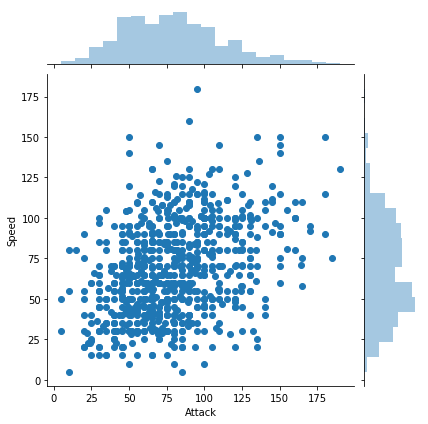

In [68]:
sns.jointplot(x="Attack", y="Speed", data=data) #как соотносятся скорость и атака у разных покемонов
plt.show()

In [69]:
data_pokemons = data[(data['Type 1'] == 'Grass') & (data['Type 2'] == 'Poison')].sort_values(by='Total', ascending=False) 

In [70]:
data_pokemons.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
452,Roserade,Grass,Poison,515,60,70,65,125,105,90
50,Vileplume,Grass,Poison,490,75,80,85,110,90,50
77,Victreebel,Grass,Poison,490,80,105,65,100,70,70


### А если посмотреть соотношение силы и скорости у ядовитых покемонов, живущих в траве?

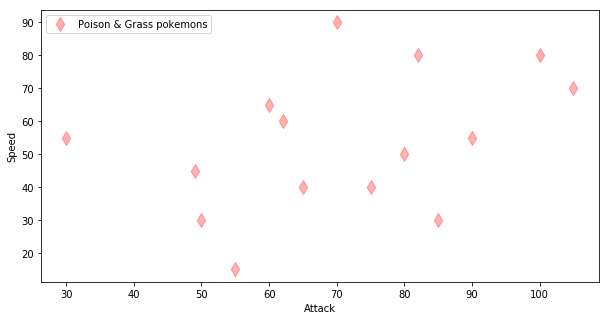

In [75]:
plt.figure(figsize = (10,5))
plt.scatter(data_pokemons.Attack, data_pokemons.Speed, c='red', alpha = 0.3, s=100, marker='d',label='Poison & Grass pokemons')
plt.xlabel("Attack")
plt.ylabel("Speed")
plt.legend(loc='upper left')
plt.show()

## Сохранение таблицы в Excel

In [91]:
from pandas import ExcelWriter

In [92]:
data_pokemons.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
452,Roserade,Grass,Poison,515,60,70,65,125,105,90
50,Vileplume,Grass,Poison,490,75,80,85,110,90,50
77,Victreebel,Grass,Poison,490,80,105,65,100,70,70


In [94]:
writer = pd.ExcelWriter('Pokemons.xlsx')
data_pokemons[['Name','Type 1','Type 2','Total']][0:15].to_excel(writer, 'top')
writer.save()